# 2. Example: SQGTurb model and customizing model parameters

In this notebook, we will use a more complex model known as a "surface quasi-geostrophic turbulence" model, or SQGTurb. 

We'll also learn about customizing model parameters, but remember that this isn't necessary: all of the data generators in dabench have sensible defaults. 

### Part I: Imports and visualizing our initial conditions

As usual, we start by import "data" from the dabench package. We'll also import matplotlib to help us visualize.


In [1]:
import matplotlib.pyplot as plt
from dabench import data

In [2]:
sqg_model = data.SQGTurb()

In [3]:
# The original_dim attribute stores the original dimensions of our system
sqg_model.original_dim

(2, 96, 96)

In this case, our system has:
- 2 vertical levels
- 96 rows
- 96 columns

But SQGTurb is different from prevous models because it does the modeling in spectral space.

If we look at our initial conditions, we'll see they're complex numbers with both real and imaginary parts.

However, we can access the data in real, gridded space using "x0_gridded".

This is true throughout DataAssimBench: 
- The .x0 and .values attributes let you access the values in the model/system space as a flat state vector with shape (system_dim,) or stack of state vectors with shape (time_dim, system_dim).
- The .x0_gridded and .values_gridded provide the values in gridded dimensions. The shape and number of dimensions depends on the model.



In [4]:
print(sqg_model.x0.shape)
print(sqg_model.x0)

(9408,)
[-1.8085938e+00+0.0000000e+00j  1.6730644e+06-2.3123864e+05j
 -1.8980355e+06+1.8295305e+06j ...  5.9080791e+03-7.9948115e+03j
  5.3827861e+03+5.8473625e+04j  7.0947222e-04-4.7155607e-02j]


In [5]:
sqg_model.x0

array([-1.8085938e+00+0.0000000e+00j,  1.6730644e+06-2.3123864e+05j,
       -1.8980355e+06+1.8295305e+06j, ...,  5.9080791e+03-7.9948115e+03j,
        5.3827861e+03+5.8473625e+04j,  7.0947222e-04-4.7155607e-02j],
      dtype=complex64)

In [6]:
print(sqg_model.x0_gridded.shape) # 2 levels, 96 x 96
print(sqg_model.x0_gridded)

(2, 96, 96)
[[[-1917.1141  -1176.1046  -1478.8353  ... -3628.34    -4006.5837
   -3105.4714 ]
  [-2659.8015  -1314.5762  -1590.6144  ... -2359.4014  -3938.7356
   -3812.4648 ]
  [-3177.6284  -2301.677    -735.6406  ... -1943.2268  -3462.656
   -3517.378  ]
  ...
  [ -370.9156    158.84636   511.21332 ... -2259.7454  -2582.0308
   -2050.3591 ]
  [ -169.40625  -557.1586    330.20032 ... -2109.7537  -2990.3303
   -1765.2604 ]
  [-1181.4802  -1169.0564  -1347.2291  ... -3523.5088  -3828.986
   -2149.8088 ]]

 [[-3060.4092  -4000.184   -4000.774   ... -3109.5813  -2342.5452
   -2322.5835 ]
  [-2426.8823  -3433.2961  -4397.769   ... -2934.4182  -2549.419
   -2361.098  ]
  [-1715.0706  -1935.1869  -3230.6433  ... -3214.8625  -2830.9663
   -2184.3643 ]
  ...
  [-4101.347   -3521.5798  -4382.7446  ... -2890.0312  -3430.4373
   -4084.846  ]
  [-4216.2017  -3715.9722  -4177.1     ... -2081.1418  -2517.1873
   -3366.838  ]
  [-3724.3572  -3758.4592  -3853.391   ... -2287.0386  -1986.5734
   -2725.

Now let's visualize the initial conditions using x0_gridded. It's a 2-level model, so we can use both: 

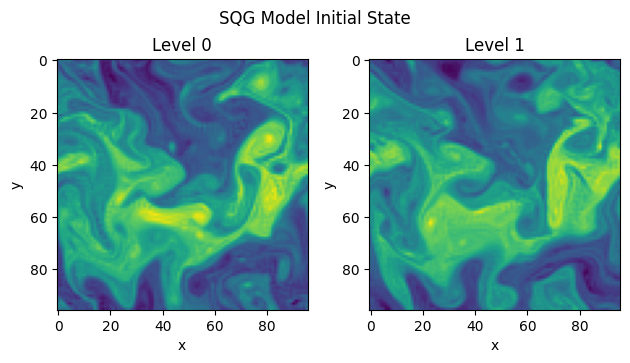

In [7]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('SQG Model Initial State')
ax[0].imshow(sqg_model.x0_gridded[0])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Level 0')
ax[1].imshow(sqg_model.x0_gridded[1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Level 1')
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

### Part II: Running SQG Model

Let's run our model for 1000 timesteps. This may take a few seconds:

In [8]:
sqg_model.generate(n_steps=1000)

In [9]:
print(sqg_model.values.shape)
print(sqg_model.values_gridded.shape)

(1001, 9408)
(1001, 2, 96, 96)


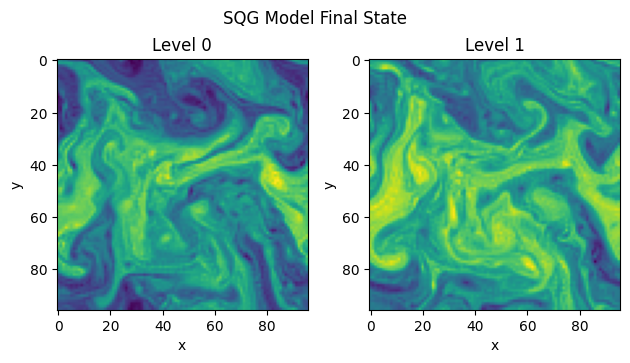

In [10]:
fig, ax = plt.subplots(1, 2)
fig.suptitle('SQG Model Final State')
ax[0].imshow(sqg_model.values_gridded[-1, 0])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Level 0')
ax[1].imshow(sqg_model.values_gridded[-1, 1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Level 1')
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

Looks like it did something!

### Part III

As with all the other models in DataAssimBench, SQGTurb comes with sensible defaults. In most cases, you will probably just want to change the number of steps you run using .generate(n_steps=XX). 

But DataAssimBench is also built to be flexible. Maybe you want to change the model parameters to meet your specific needs. Let's learn how by modifying a few of the model parameters in data.SQGTurb. 

In [11]:
# View parameters for sqgturb
help(data.SQGTurb)

Help on class SQGTurb in module dabench.data.sqgturb:

class SQGTurb(dabench.data._data.Data)
 |  SQGTurb(pv=None, f=0.0001, nsq=0.0001, L=20000000.0, H=10000.0, U=30.0, r=0.0, tdiab=864000.0, diff_order=8, diff_efold=28800.0, symmetric=True, dealias=True, precision='single', tstart=0, system_dim=None, input_dim=None, output_dim=None, time_dim=None, values=None, times=None, delta_t=900, store_as_jax=False, **kwargs)
 |  
 |  Class to set up SQGTurb model and manage data.
 |  
 |  Attributes:
 |      pv (ndarray): Potential vorticity array. If None (default),
 |           loads data from 57600 step spinup with initial conditions taken
 |           from Jeff Whitaker's original implementation:
 |           https://github.com/jswhit/sqgturb. 57600 steps matches the
 |           "nature run" spin up in that repository.
 |      system_dim (int): The dimension of the system state
 |      time_dim (int): The dimension of the timeseries (not used)
 |      delta_t (float): model time step (seco

In [12]:
# We can provide parameters as a dictionary:
params_dict = {
    'H': 20000.0, # Increase height of layers
    'U': 50.0 # Increase basic state velocity
}
sqg_model_new = data.SQGTurb(**params_dict
)

In [13]:
sqg_model_new.generate(n_steps=1000)

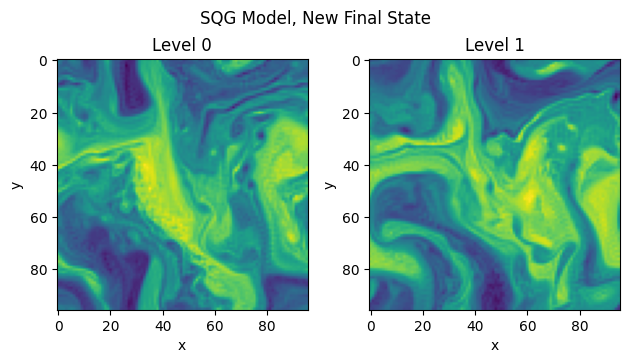

In [14]:
# Looks notably different than before
fig, ax = plt.subplots(1, 2)
fig.suptitle('SQG Model, New Final State')
ax[0].imshow(sqg_model_new.values_gridded[-1, 0])
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Level 0')
ax[1].imshow(sqg_model_new.values_gridded[-1, 1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('Level 1')
fig.tight_layout()
fig.subplots_adjust(top=1.2)
plt.show()

You can try experimenting with all the other model parameters.